In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
tweets_with_topics = pd.read_csv('../data/tweet_data/tweets_with_topics_post.csv', index_col=False)
sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)

all_tweets_cleaned = pd.read_csv('../data/tweet_data/all_tweets_cleaned.csv', index_col=False)
dem_df['sentiment'] = dem_df['sentiment'].fillna(0)
rep_df['sentiment'] = rep_df['sentiment'].fillna(0)




In [15]:
sa_all_tweets.head(3)

,tweet_id,stripped_text,twitter_handle,sentiment
0,0,With corruption being one of the biggest conce...,CA_Countryman,0
1,1,With corruption being one of the biggest conce...,CA_Countryman,0
2,2,Here is an important notice concerning Christo...,CA_Countryman,2


In [16]:
tweets_with_topics.columns

Index(['tweet_idx', 'stripped_text', 'party', 'gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump', 'twitter_handle'],
      dtype='object')

In [17]:
sa_all_tweets.columns

Index(['tweet_id', 'stripped_text', 'twitter_handle', 'sentiment'], dtype='object')

In [18]:
tweets_with_topics = tweets_with_topics.rename(index=str, columns={"tweet_idx": "tweet_id"})
tweets_topic_sa = tweets_with_topics.merge(sa_all_tweets[['tweet_id', 'sentiment']], on=['tweet_id'], how='left')


In [19]:
print(len(tweets_topic_sa[tweets_topic_sa['sentiment'].isna()]))
print(len(tweets_topic_sa))
print(len(tweets_with_topics))
print(len(sa_all_tweets))

0
557549
557549
609527


In [20]:
print(len(all_tweets_cleaned))
print(len(tweets_with_topics))

557549
557549


In [21]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [22]:
# # Add 'party' column to tweets with topics

# tweets_with_topics = tweets_with_topics.merge(all_tweets_cleaned[['tweet_idx', 'twitter_handle']], how='left', on=['tweet_idx'])
                                                                                         
# dem_candidates = dem_df.twitter_handle.unique()
# dem_candidates2 = dem_df.twitter_handle2.unique()

# party = []
# for i, r in tweets_with_topics.iterrows():
#     if i % 20000 == 0:
#         print('{} / {}'.format(i, len(tweets_with_topics)))
#     if r['twitter_handle'] in dem_candidates or r['twitter_handle'] in dem_candidates2:
#         party.append(0)
#     else:
#         party.append(1)
# tweets_with_topics['party'] = party

# tweets_with_topics.to_csv('../data/tweet_data/tweets_with_topics_post.csv', index=False)


In [23]:
topics = ['gun_control', 'health_care',
       'abortion', 'immigration', 'education', 'jobs'
          , 'environment','women', 'lgbt', 'freedom', 'trump']
topic_cols = ['{}_tweet_count'.format(t) for t in topics]

In [24]:
print("dem candidates w/ no classified topics: ", len(dem_df[(dem_df['gun_control_tweet_count'] == 0) & 
          (dem_df['health_care_tweet_count'] == 0) &
          (dem_df['abortion_tweet_count'] == 0) &
          (dem_df['immigration_tweet_count'] == 0) &
          (dem_df['education_tweet_count'] == 0) &
          (dem_df['jobs_tweet_count'] == 0) &
          (dem_df['environment_tweet_count'] == 0) &
          (dem_df['women_tweet_count'] == 0) &
          (dem_df['lgbt_tweet_count'] == 0) &
          (dem_df['freedom_tweet_count'] == 0) & (dem_df['trump_tweet_count'] == 0)]) / len(dem_df))

print("rep candidates w/ no classified topics: ", len(rep_df[(rep_df['gun_control_tweet_count'] == 0) & 
          (rep_df['health_care_tweet_count'] == 0) &
          (rep_df['abortion_tweet_count'] == 0) &
          (rep_df['immigration_tweet_count'] == 0) &
          (rep_df['education_tweet_count'] == 0) &
          (rep_df['jobs_tweet_count'] == 0) &
          (rep_df['environment_tweet_count'] == 0) &
          (rep_df['women_tweet_count'] == 0) &
          (rep_df['lgbt_tweet_count'] == 0) &
          (rep_df['freedom_tweet_count'] == 0) & (rep_df['trump_tweet_count'] == 0)]) / len(rep_df))

dem candidates w/ no classified topics:  0.22685788787483702
rep candidates w/ no classified topics:  0.4287769784172662


In [25]:
def get_topic_df(candidate_df, party):
    max_count_col = []
    median_count_col = []
    avg_count_col = []
    total_classified_col = []
    
    for t in topics:
        topic_count = len(tweets_with_topics[(tweets_with_topics[t] == 1) & (tweets_with_topics['party'] == party)])
        max_count = candidate_df["{}_tweet_count".format(t)].max()
        avg_count = candidate_df["{}_tweet_count".format(t)].mean()
        max_count_col.append(max_count)
        avg_count_col.append(round(avg_count, 2))
        total_classified_col.append(topic_count)
    df = pd.DataFrame(np.transpose([topics,avg_count_col, max_count_col, total_classified_col])
             , columns=['topic', 'avg_count', 'max_count', 'total_classified'])
    df['max_count'] = df['max_count'].astype('int32')
    df['total_classified'] = df['total_classified'].astype('int32')
    return df
    
dem_topic_df = get_topic_df(dem_df, 0)
rep_topic_df = get_topic_df(rep_df, 1)

In [26]:
print("total tweets: ",len(tweets_with_topics[tweets_with_topics['party'] == 0]))
dem_topic_df.sort_values(by=['total_classified'], ascending=False).reset_index(drop=True)

total tweets:  381881


,topic,avg_count,max_count,total_classified
0,trump,28.24,554,21582
1,health_care,23.49,343,17831
2,gun_control,15.01,352,11455
3,jobs,13.25,157,10071
4,education,9.55,192,7292
5,environment,7.65,1026,5855
6,immigration,7.04,192,5379
7,lgbt,2.39,64,1826
8,freedom,2.16,55,1651
9,women,2.03,59,1548


In [27]:
print("total tweets: ", len(tweets_with_topics[tweets_with_topics['party'] == 1]))
rep_topic_df.sort_values(by=['total_classified'], ascending=False).reset_index(drop=True)

total tweets:  175668


,topic,avg_count,max_count,total_classified
0,trump,19.53,1015,13818
1,immigration,6.15,324,4339
2,jobs,5.74,200,4124
3,gun_control,4.23,254,3086
4,health_care,3.77,473,2956
5,freedom,3.48,276,2418
6,education,2.47,83,1738
7,abortion,1.96,75,1405
8,environment,0.56,33,435
9,women,0.21,10,157


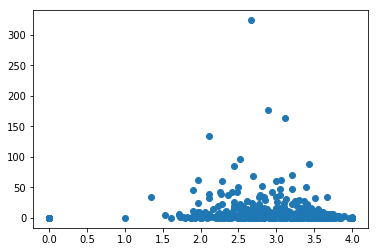

In [38]:
fig, axs = plt.subplots(1)
axs.scatter(rep_df['sentiment'], rep_df['immigration_tweet_count'])

In [29]:
tweets_with_topics.columns

Index(['tweet_id', 'stripped_text', 'party', 'gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump', 'twitter_handle'],
      dtype='object')

(array([2852.,    0.,    0.,    0.,    0., 2615.,    0.,    0.,    0.,
        8351.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

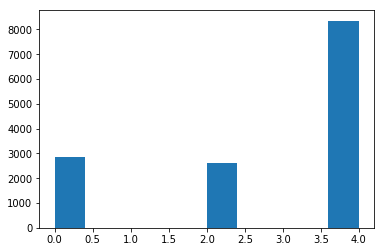

In [39]:
fig, axs = plt.subplots(1)
rep = tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & tweets_topic_sa['party'] == 1].sentiment
axs.hist(rep)

In [123]:
def print_sentiment_breakdown(tweets_topic_sa, topic):
    print("== democratic ratios == ")
    dem = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 1]
    rep = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]
    print("negative sentiment: ", len(dem[dem['sentiment'] == 0]) / len(dem))
    print("positive sentiment: ", len(dem[dem['sentiment'] == 4]) / len(dem))
    print("neutral sentiment: ", len(dem[dem['sentiment'] == 2]) / len(dem))

    print("\n== republican ratios == ")
    print("negative sentiment: ", len(rep[rep['sentiment'] == 0]) / len(rep))
    print("positive sentiment: ", len(rep[rep['sentiment'] == 4]) / len(rep))
    print("neutral sentiment: ", len(rep[rep['sentiment'] == 2]) / len(rep))

def plot_topic(topic):
    print(topic)
    f, axs = plt.subplots(1,2,figsize=(15,4))
    rep = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 1].sentiment
    dem = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0].sentiment

    axs[0].hist(dem)
    axs[0].set_title("democratic - {}".format(topic))
    axs[1].hist(rep)
    axs[1].set_title("republican - {}".format(topic))
    print_sentiment_breakdown(tweets_topic_sa, topic)
    return dem, rep

In [124]:
print(len(tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0) & (tweets_topic_sa['sentiment'] == 0)]))

print(len(tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0)]))
print(4158 /17831)


4158
17831
0.23318938926588526


trump
== democratic ratios == 
negative sentiment:  0.2063974525980605
positive sentiment:  0.6043566362715299
neutral sentiment:  0.18924591113040962

== republican ratios == 
negative sentiment:  0.22736426652149686
positive sentiment:  0.5808074213167909
neutral sentiment:  0.1918283121617123


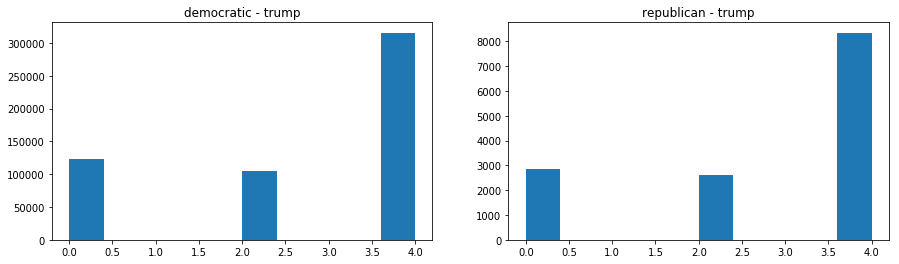

In [125]:
topic = 'trump'

dem, rep = plot_topic(topic)
# print_sentiment_breakdown(dem, rep)

health_care
== democratic ratios == 
negative sentiment:  0.21346414073071718
positive sentiment:  0.5967523680649527
neutral sentiment:  0.18978349120433016

== republican ratios == 
negative sentiment:  0.22691595458291036
positive sentiment:  0.5813091762788207
neutral sentiment:  0.19177486913826897


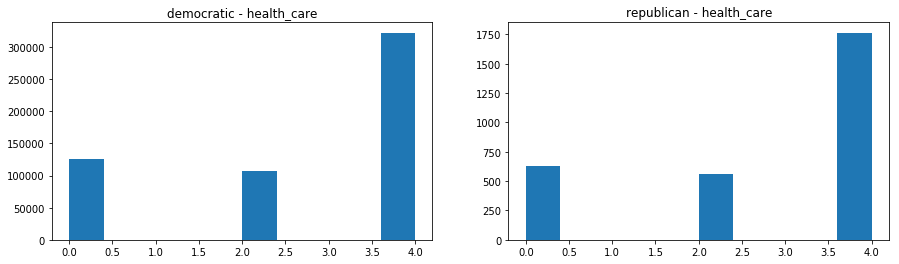

In [126]:
topic = 'health_care'

df, df1 = plot_topic(topic)
# print_sentiment_breakdown(df, df1)

immigration
== democratic ratios == 
negative sentiment:  0.1945148651763079
positive sentiment:  0.6204194514865177
neutral sentiment:  0.18506568333717446

== republican ratios == 
negative sentiment:  0.22709820863686483
positive sentiment:  0.5810849406192946
neutral sentiment:  0.1918168507438405


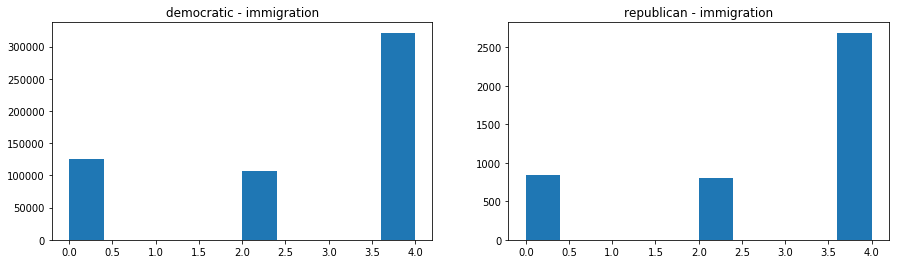

In [122]:
topic = 'immigration'
dem, rep = plot_topic(topic)